In [1]:
from __future__ import print_function
%matplotlib inline

In [2]:
import pandas as pd
data = pd.read_csv('housing.csv')
print(data.shape)
data.head()

(489, 4)


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


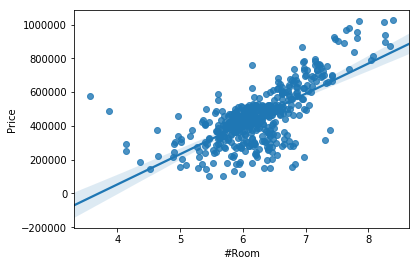

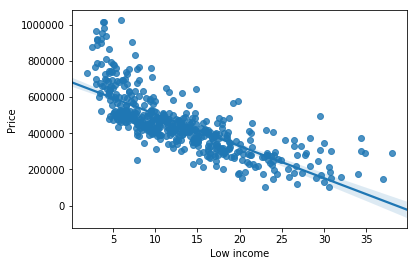

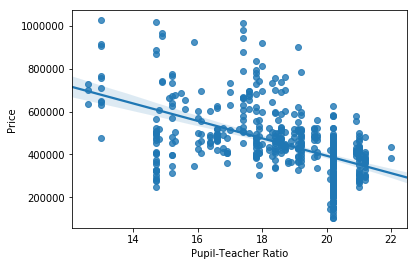

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
def check_feature(data, feature, xlabel, target = 'MEDV', ylabel = 'Price'):
    plt.figure()
    sns.regplot(x=feature, y=target, data=data)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

check_feature(data, 'RM', '#Room')
check_feature(data, 'LSTAT', 'Low income')
check_feature(data, 'PTRATIO', 'Pupil-Teacher Ratio')

In [4]:
import numpy as np
t = np.array([0,1,2,3])
ypred = 0.5 * 9.8 * t
y = ypred+np.random.normal(size=ypred.shape,scale=0.1)

In [5]:
df = pd.DataFrame({'t':t, 'dy': y, 'prediction': ypred})
df[['t','dy','prediction']]

,t,dy,prediction
0,0,0.002238,0.0
1,1,4.835874,4.9
2,2,9.842453,9.8
3,3,14.652858,14.7


In [6]:
np.mean( (y-ypred)**2 )

0.0020354538771444586

In [7]:
X = data[['RM', 'LSTAT', 'PTRATIO']]
y = data[['MEDV']]


In [8]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)
linreg.coef_, linreg.intercept_

(array([[ 86565.23613299, -10849.34038381, -19492.11563515]]),
 array([415464.39651673]))

In [9]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, linreg.predict(X))**0.5

87769.84413151712

In [10]:
from sklearn.metrics import r2_score
r2_score(y, linreg.predict(X))

0.7176275212982739

In [11]:
ypred = linreg.predict(X)

Text(0,0.5,'Prediction')

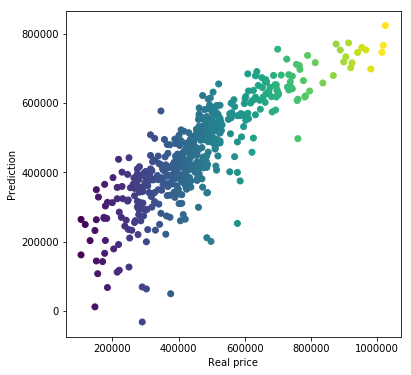

In [12]:
plt.figure(figsize=(6,6))
plt.scatter(y, ypred, c=y)
plt.xlabel('Real price')
plt.ylabel('Prediction')

In [13]:
linreg.coef_, linreg.intercept_

(array([[ 86565.23613299, -10849.34038381, -19492.11563515]]),
 array([415464.39651673]))

In [14]:
def run_model(model, score, X, y):
    model.fit(X,y)
    ypred = model.predict(X)
    s = score(y, ypred)
    return model, s

In [15]:
run_model(LinearRegression(), mean_squared_error, X, y)

(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 7703545538.8708105)

In [16]:
from sklearn.tree import DecisionTreeRegressor
model, score = run_model(DecisionTreeRegressor(), mean_squared_error, X, y)
print(score, score**0.5)

0.0 0.0


In [18]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=42, test_size=0.2)

In [19]:
def run_model(model, score, X, y, Xt, yt):
    model.fit(X,y)
    ypred = model.predict(Xt)
    s = score(yt, ypred)
    return model, s

In [20]:
run_model(LinearRegression(), mean_squared_error, Xtrain, ytrain, Xtest, ytest)

(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 6789025559.265893)

In [22]:
run_model(DecisionTreeRegressor(), mean_squared_error, Xtrain, ytrain, Xtest, ytest)

(DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'), 6211980000.0)

In [23]:
run_model(DecisionTreeRegressor(max_depth=7), mean_squared_error, Xtrain, ytrain, Xtest, ytest)

(DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
 4569346416.5693035)

In [24]:
irange = np.arange(1,11)
score = np.zeros(irange.shape)
for i in irange:
    _, score[i-1] = run_model(DecisionTreeRegressor(max_depth=i), mean_squared_error, Xtrain, ytrain, Xtest, ytest)

In [25]:
df = pd.DataFrame({'depth':irange, 'L':score, 'L^0.5':score**0.5})
df[['depth','L','L^0.5']]

,depth,L,L^0.5
0,1,1.484355e+10,121834.091648
1,2,6.994706e+09,83634.360031
2,3,5.118436e+09,71543.244497
3,4,3.428515e+09,58553.524750
4,5,3.858735e+09,62118.719292
5,6,4.614985e+09,67933.679345
6,7,4.958146e+09,70414.106659
7,8,5.181985e+09,71986.004597
8,9,5.353855e+09,73170.041649
9,10,5.150945e+09,71770.080898


Text(0,0.5,'Price deviation')

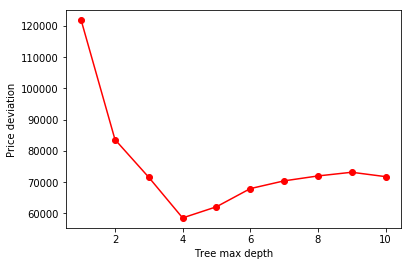

In [26]:
plt.figure()
plt.plot(df['depth'], df['L^0.5'], 'o-', color='r')
plt.xlabel('Tree max depth')
plt.ylabel('Price deviation')

In [67]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
mse = -cross_val_score(LinearRegression(), X, y, cv = cv, scoring='neg_mean_squared_error')
np.mean(mse**0.5), np.std(mse**0.5)

(87319.50484015327, 6404.2222690922945)

In [69]:
from sklearn.tree import DecisionTreeRegressor
s = []
irange = np.arange(1,11)
for i in irange:
    mse = -cross_val_score(DecisionTreeRegressor(max_depth=i), X, y, cv = cv, scoring='neg_mean_squared_error')
    print( [np.mean(mse**0.5), np.std(mse**0.5)] )
    s.append( [np.mean(mse**0.5), np.std(mse**0.5)] )
s = np.array(s)


[130473.77738584648, 10216.243769210874]
[97632.33710852657, 7372.075361928177]
[80870.64644073714, 6134.813818816581]
[73843.93237125993, 7251.655968584422]
[77092.86953446583, 8747.51101140329]
[80158.41262020603, 9488.291112156776]
[82616.19732698526, 9641.070624017455]
[84813.56185926516, 8128.394255130332]
[86945.47884553572, 8430.929778307778]
[90408.85722851999, 8822.545298464984]


Text(0,0.5,'Price deviation')

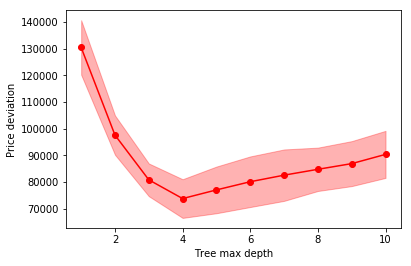

In [70]:
plt.figure()
plt.plot(irange, s[:,0], 'o-', color='r')
plt.fill_between(irange, s[:,0]-s[:,1], s[:,0]+s[:,1], alpha=0.3, color='r')
plt.xlabel('Tree max depth')
plt.ylabel('Price deviation')

In [71]:
from sklearn.tree import DecisionTreeRegressor
s = []
irange = np.arange(1,11)
for i in irange:
    mse = cross_val_score(DecisionTreeRegressor(max_depth=i), X, y, cv = cv, scoring='r2')
    print( [np.mean(mse), np.std(mse)] )
    s.append( [np.mean(mse), np.std(mse)] )
s = np.array(s)


[0.37171963934083185, 0.0662588559025254]
[0.6456695707120506, 0.058664155793669244]
[0.7576288144564469, 0.03365764825071736]
[0.7975212346364281, 0.04243605151788391]
[0.7801819540846571, 0.03702655934952207]
[0.7670216108734002, 0.04612436669068312]
[0.7507982170137744, 0.044471227061048405]
[0.7264563279234675, 0.057949556792899495]
[0.707952218674527, 0.05777692132289836]
[0.6992640432377429, 0.0641507129487738]


Text(0,0.5,'r2')

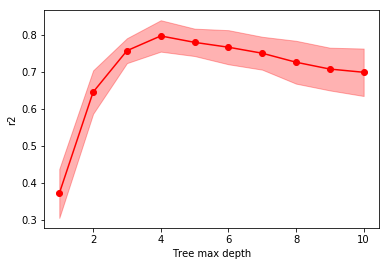

In [72]:
plt.figure()
plt.plot(irange, s[:,0], 'o-', color='r')
plt.fill_between(irange, s[:,0]-s[:,1], s[:,0]+s[:,1], alpha=0.3, color='r')
plt.xlabel('Tree max depth')
plt.ylabel('r2')

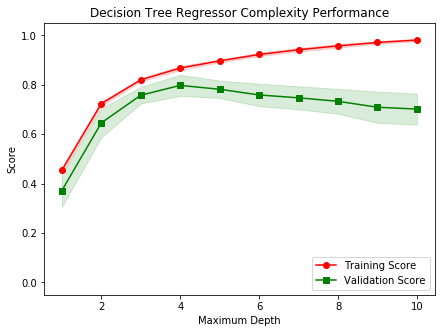

In [65]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold, ShuffleSplit
#cv = KFold(n_splits=5)
cv = ShuffleSplit(test_size=0.2, n_splits=10, random_state=42)
train_scores, test_scores = validation_curve(DecisionTreeRegressor(), X, y, \
        "max_depth", irange, cv = cv, scoring = 'r2')

# Find the mean and standard deviation for smoothing
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(7, 5))
plt.title('Decision Tree Regressor Complexity Performance')
plt.plot(irange, train_mean, 'o-', color = 'r', label = 'Training Score')
plt.plot(irange, test_mean, 's-', color = 'g', label = 'Validation Score')
plt.fill_between(irange, train_mean - train_std, \
    train_mean + train_std, alpha = 0.15, color = 'r')
plt.fill_between(irange, test_mean - test_std, \
    test_mean + test_std, alpha = 0.15, color = 'g')

# Visual aesthetics
plt.legend(loc = 'lower right')
plt.xlabel('Maximum Depth')
plt.ylabel('Score')
plt.ylim([-0.05,1.05])
plt.show()


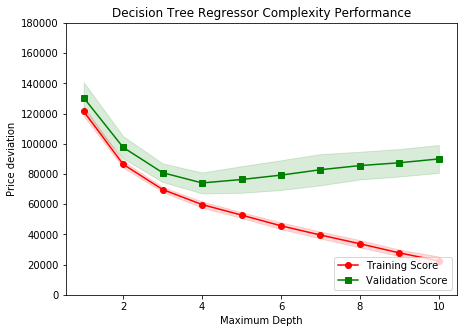

In [66]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold,ShuffleSplit
cv = ShuffleSplit(test_size=0.2, n_splits=10, random_state=42)
train_scores, test_scores = validation_curve(DecisionTreeRegressor(), X, y, \
        "max_depth", irange, cv = cv, scoring = 'neg_mean_squared_error')

# Find the mean and standard deviation for smoothing
train_mean = np.mean((-train_scores)**0.5, axis=1)
train_std = np.std((-train_scores)**0.5, axis=1)
test_mean = np.mean((-test_scores)**0.5, axis=1)
test_std = np.std((-test_scores)**0.5, axis=1)

# Plot the validation curve
plt.figure(figsize=(7, 5))
plt.title('Decision Tree Regressor Complexity Performance')
plt.plot(irange, train_mean, 'o-', color = 'r', label = 'Training Score')
plt.plot(irange, test_mean, 's-', color = 'g', label = 'Validation Score')
plt.fill_between(irange, train_mean - train_std, \
    train_mean + train_std, alpha = 0.15, color = 'r')
plt.fill_between(irange, test_mean - test_std, \
    test_mean + test_std, alpha = 0.15, color = 'g')

# Visual aesthetics
plt.legend(loc = 'lower right')
plt.xlabel('Maximum Depth')
plt.ylabel('Price deviation')
plt.ylim([0,180000])
plt.show()


In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals import joblib
import pandas as pd
import pickle
data = pd.read_csv('housing.csv')
X = data[['RM', 'LSTAT', 'PTRATIO']]
y = data[['MEDV']]
model = DecisionTreeRegressor(max_depth=4).fit(X,y)
joblib.dump(model, 'dtr_model.pkl')

['dtr_model.pkl']

In [5]:
from sklearn.externals import joblib
from sklearn.metrics import mean_squared_error
model = joblib.load('dtr_model.pkl')
mean_squared_error(y, model.predict(X))**0.5

60870.007728950564